## Part 1

> Complete the online tutorial at https://machinelearningmastery.com/machine-learning-in-python-step-by-step/.

I do a few things differently than the author.

---

### Package Imports

I will import all my packages in the cell below.

In [10]:
import sys
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# I do not want to ommit the package name space when I use the functions within.
# Some packages require more specific imports as they do not automatically
# import subpackages.
import sklearn as sk

# The data the author uses can be imported locally from sklearn, it does not
# need to be downloaded.
from sklearn import datasets
import sklearn.model_selection

In [11]:
# sns.set_style("whitegrid")
# plt.style.use('dark_background')

---

## Start Python and Check Versions

>It is a good idea to make sure your Python environment was installed successfully and is working as expected.
>
>The script below will help you test out your environment. It imports each library required in this tutorial and prints the version.
 
You can view the packages you are working with and their version from the terminal with `pip freeze`.

In [12]:
# It is cool to pull data like this, but there is no reason to in this case.
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# dataset = pd.read_csv(url, names=names)
raw_dataset = datasets.load_iris()
dataset = pd.DataFrame(raw_dataset.data, columns=raw_dataset.feature_names)

In [13]:
# dataset.head()

In [14]:
# I am missing the classification column.
dataset['class'] = [raw_dataset.target_names[x] for x in raw_dataset.target]

In [8]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

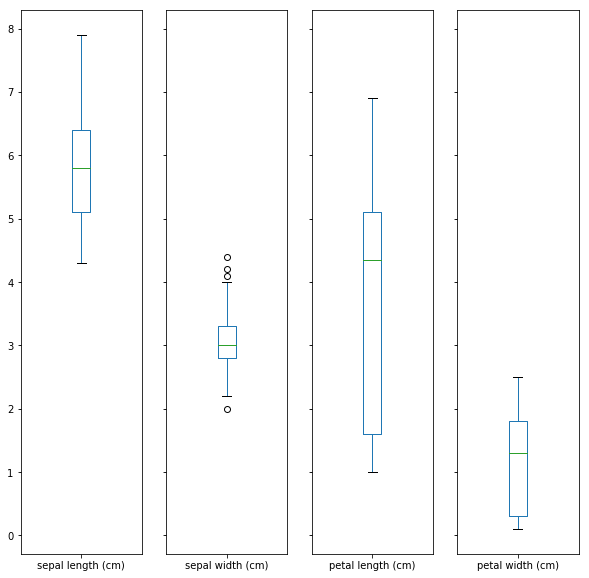

In [9]:
dataset.plot(
    kind='box', 
    subplots=True, 
#     layout=(2,2), 
    sharex=False, 
    sharey=True,     # Shared the y-axis so the plots are comparable.
    figsize=(10,10)  # Enlarged the figure.
)
plt.show()

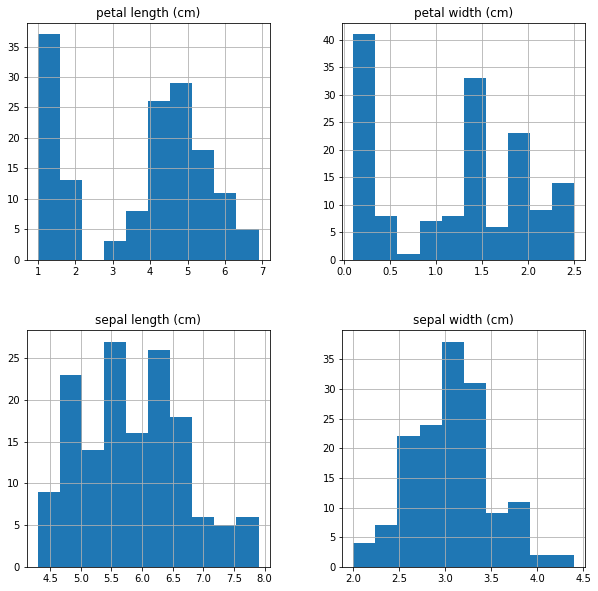

In [10]:
dataset.hist(
    figsize=(10,10)
)
plt.show()

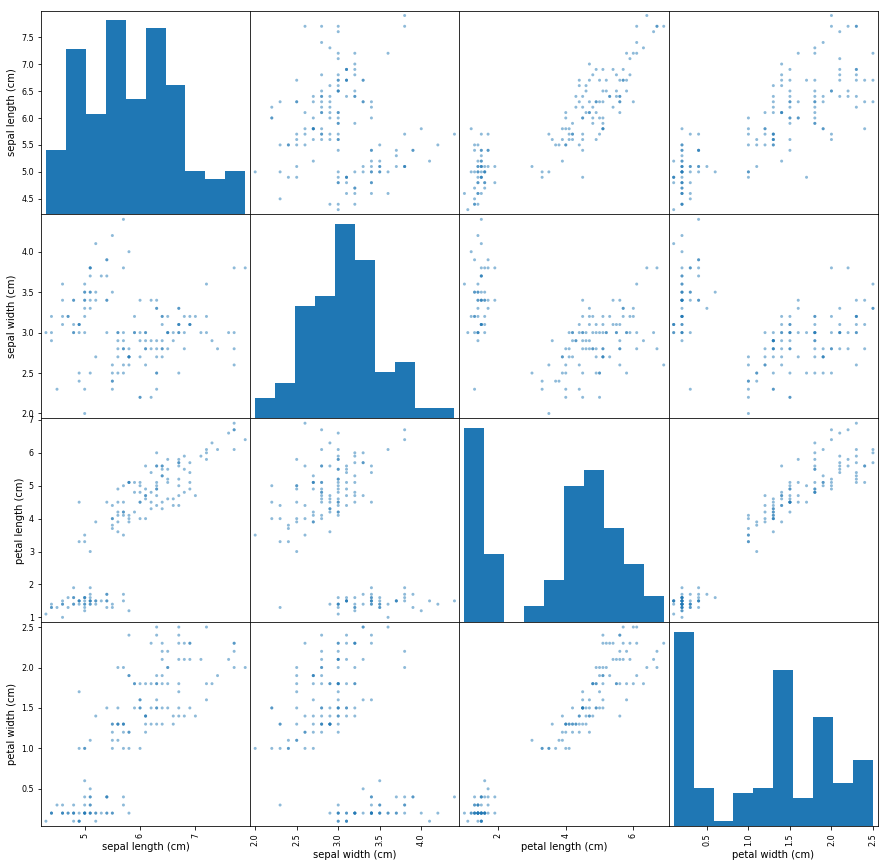

In [11]:
pd.plotting.scatter_matrix(dataset, figsize=(15,15))
plt.show()

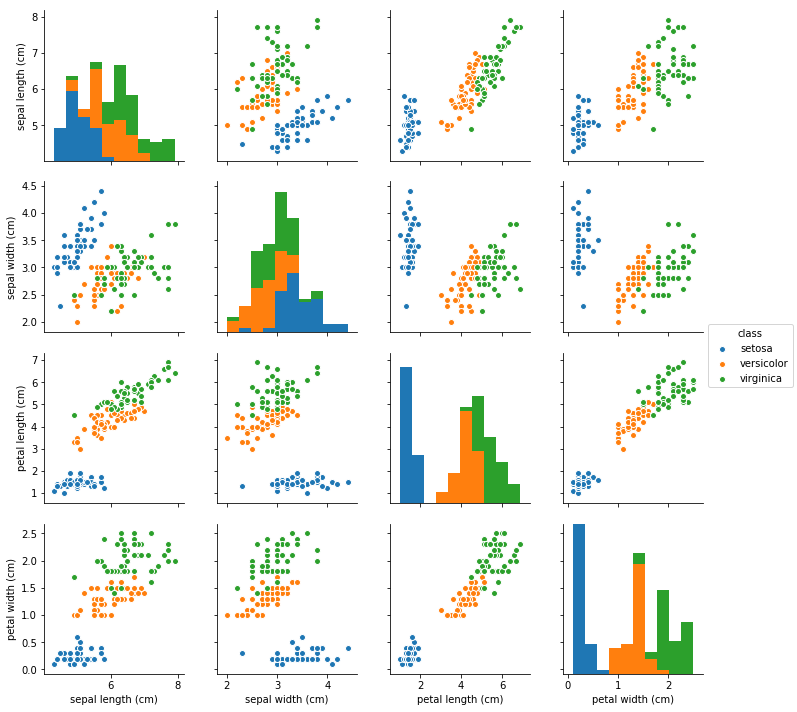

In [12]:
# plt.figure(figsize=[10, 10])

sns.pairplot(
    data=dataset,
    hue="class",
)

In [13]:
list(dataset)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'class']

In [14]:
melted_dataset = dataset.melt(
    id_vars='class',
    var_name='measurement type',
    value_name='cm'
)

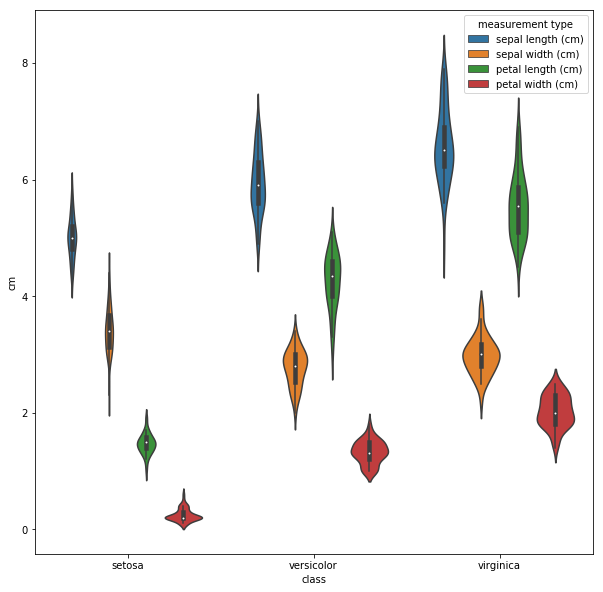

In [15]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

sns.violinplot(
    x="class", 
    y='cm',
    hue='measurement type',
    data=melted_dataset,
    ax=ax
)

## Evaluate Some Algorithms

>Now it is time to create some models of the data and estimate their accuracy on unseen data.
>
>Here is what we are going to cover in this step:
>
>  1. Separate out a validation dataset.
>  2. Set-up the test harness to use 10-fold cross validation.
>  3. Build 5 different models to predict species from flower measurements
>  4. Select the best model.


### Shape the data

Remove the data from the pandas dataframe. Then split the names from the measurements.

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
iris_array = dataset.values

# Examine a single row.
# Use a non-crazy variable name.
iris_array[0]

array([5.1, 3.5, 1.4, 0.2, 'setosa'], dtype=object)

In [18]:
# Use sane variable names. Never use 'X' or 'Y' in cases like this.
iris_data = iris_array[:, 0:4]
iris_names = iris_array[:, 4]

In [19]:
# Split array and variable assignment operations.
validation_size = 0.20
seed = 42
scoring = 'accuracy'

In [20]:
# I do not leave off the package name-space in most cases.
iris_data_train, \
iris_data_validation, \
iris_name_train, \
iris_name_validation = \
sk.model_selection.train_test_split(
    iris_data,
    iris_names,
    test_size=0.20,
    random_state=42,
)

In [21]:
iris_data_train[0:5]

array([[4.6, 3.6, 1.0, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]], dtype=object)

In [22]:
iris_data_validation[0:5]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6.0, 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4]], dtype=object)

In [23]:
iris_name_train[0:5]

array(['setosa', 'setosa', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [24]:
iris_name_validation[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [25]:
train_df = pd.DataFrame(data=iris_data_train)
train_df["class"] = iris_name_train
train_df.head()

,0,1,2,3,class
0,4.6,3.6,1,0.2,setosa
1,5.7,4.4,1.5,0.4,setosa
2,6.7,3.1,4.4,1.4,versicolor
3,4.8,3.4,1.6,0.2,setosa
4,4.4,3.2,1.3,0.2,setosa


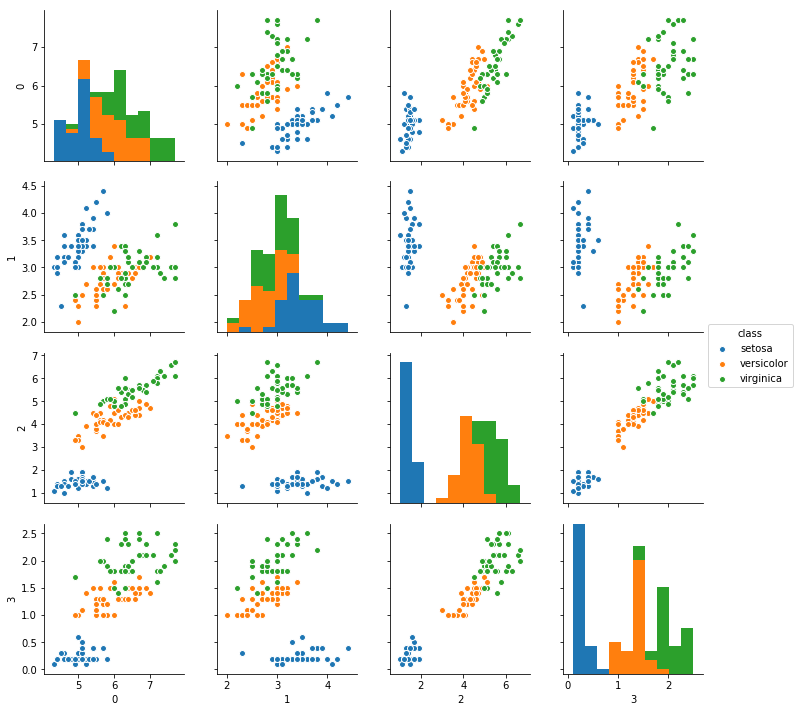

In [26]:
sns.pairplot(
    data=train_df,
    hue="class",
)

In [27]:
sk.model_selection.KFold(n_splits=10, random_state=seed)

KFold(n_splits=10, random_state=42, shuffle=False)

In [28]:
# Spot Check Algorithms
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
]

print("Method\tmean\tstd")
print("----------------------")
# evaluate each model in turn
results = []
names = []
for name, model in models:
    
    kfold = sk.model_selection.KFold(n_splits=10, random_state=seed)
    
    cv_results = sk.model_selection.cross_val_score(
        model, 
        iris_data_train, 
        iris_name_train, 
        cv=kfold, 
        scoring=scoring
    )
    
    results.append(cv_results)
    names.append(name)
    
    msg = f"{name}:\t{cv_results.mean():.2}\t{cv_results.std():.2}" 
    print(msg)

Method	mean	std
----------------------
LR:	0.95	0.041
LDA:	0.97	0.038
KNN:	0.95	0.055
CART:	0.93	0.062
NB:	0.95	0.055
SVM:	0.96	0.042


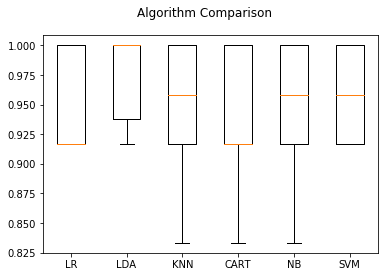

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
# Create a dataframe.
result_df = pd.DataFrame(
    np.array(results).T,
    columns=names
)
result_df

,LR,LDA,KNN,CART,NB,SVM
0,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.916667,0.916667,0.916667,1.000000,0.916667,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.916667,1.000000,1.000000,0.916667,1.000000,0.916667
4,0.916667,0.916667,0.833333,0.833333,0.833333,0.916667
5,0.916667,0.916667,0.916667,0.833333,0.916667,0.916667
6,1.000000,1.000000,0.916667,0.916667,1.000000,0.916667
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
9,1.000000,1.000000,0.916667,0.916667,0.916667,0.916667


In [31]:
melted_result_df = pd.melt(
    result_df,
    var_name='method',
    value_name='accuracy'
)

(0, 1.1)

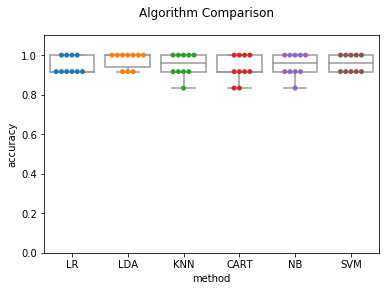

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

sns.boxplot(
    data=melted_result_df,
    x='method',
    y='accuracy',
    ax=ax,
    color='w'
)


sns.swarmplot(
    data=melted_result_df,
    x='method',
    y='accuracy',
    ax=ax,  # Sometimes using default names gets confusing!
)


ax.set_ylim([0, 1.1])

In [33]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()

knn.fit(iris_data_train, iris_name_train)

predictions = knn.predict(iris_data_validation)

print(accuracy_score(iris_name_validation, predictions))
print(confusion_matrix(iris_name_validation, predictions))
print(classification_report(iris_name_validation, predictions))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      1.00      1.00         9
  virginica       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



In [34]:
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [36]:
# Merge the dataframes back together.
# iris_name_validation
# predictions

### Generating Random Data

I want to test this more!

In [72]:
predicted_df = pd.DataFrame(
    data=iris_data_validation,
    columns=raw_dataset.feature_names,
)
predicted_df['prediction_correct'] = [a == b for a, b in zip(predictions, iris_name_validation)]
predicted_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction_correct
0,6.1,2.8,4.7,1.2,True
1,5.7,3.8,1.7,0.3,True
2,7.7,2.6,6.9,2.3,True
3,6,2.9,4.5,1.5,True
4,6.8,2.8,4.8,1.4,True


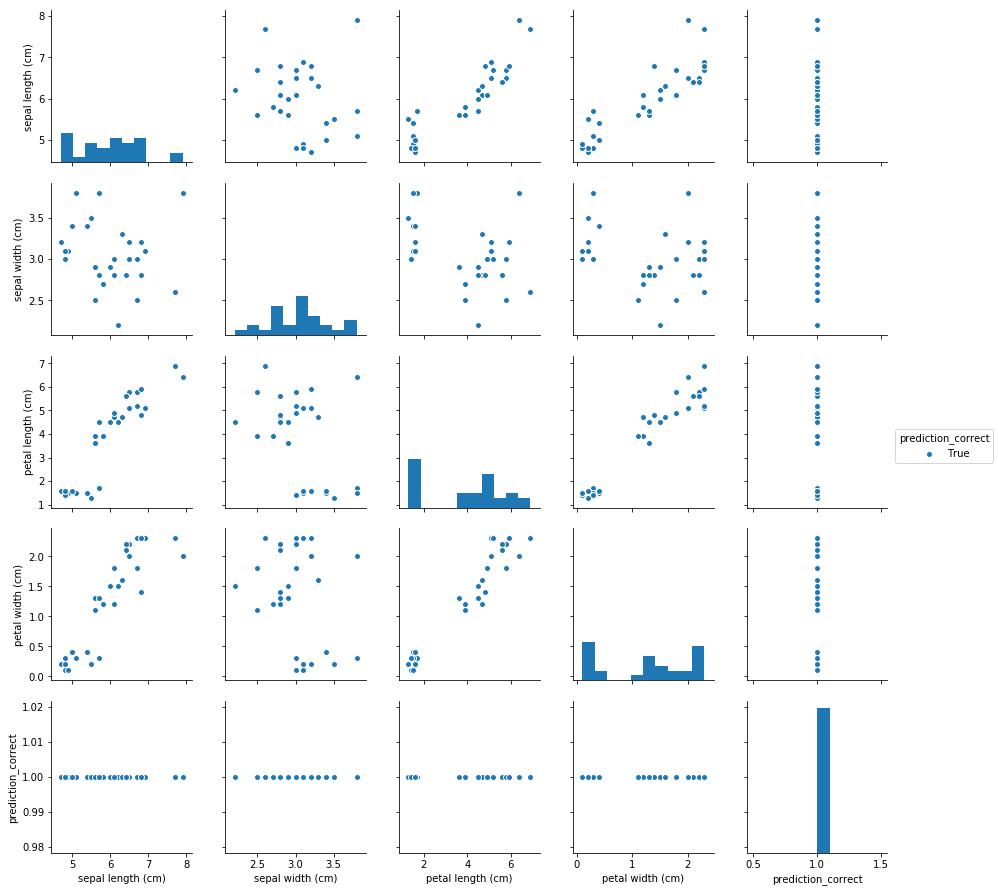

In [73]:
# We need to generate a marker list for matplotlib for seaborn.
# pred_markers
sns.pairplot(
    data=predicted_df,
    hue="prediction_correct",
)

# What is going on?

I will walk through an implementation of the k-nearest neighbors as shown in *Data Science from Scratch* by Joel Grus.

---

In [41]:
# import some more packages.
import random
import collections

In [42]:
def split_data(data, prob):
    """
    Split data into fractions [prob, 1 - prob]
    """
    
    results = [], []
    
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
        
    return results

In [43]:
def train_test_split(input_vars, output_vars, test_pct):
    """
    Splits a dataset and its answer set by the test_pct.
    """
    
    data = zip(input_vars, output_vars)
    train, test = split_data(data, 1 - test_pct)
    
    # What does this zip call do?
    input_train, output_train = zip(*train)
    intput_test, output_test = zip(*test)
    
    return input_train, intput_test, output_train, output_test

## k-Nearest Neighbors

We need:

+ Some notion of distance.
+ An assumption that the points that are close to one another are similar.

In [44]:
def squared_distance():
    return sum_of_squares(vector_subtract(v, w))

In [45]:
def majority_vote(labels):
    """Assumes labels are ordered from nearest to farthest."""
    
    vote_counts = collections.Counter(labels)
    
    winner, winner_count = vote_counts.most_common(1)[0]
    
    num_winners = len([count for count in vote_counts.values()
                       if count == winner_count])
    
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])

In [46]:
def knn_classify(k, labeled_points, new_point):
    """
    Each labeled point should be a pair (point, label)
    """
    
    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points, key=lambda point, _: distance(point, new_point))
    
    # Find the labels for the k closest.
    k_nearest_labels = [label for unused, label in by_distance[:k]]
    
    # Vote.
    return majority_vote(k_nearest_labels)